# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [123]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from citipy import citipy
from api_keys import weather_api_key
from scipy.stats import linregress
import scipy.stats as st


In [124]:
api_key = weather_api_key
city_name = "London"
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={api_key}&units=Imperial"



In [125]:
requests.get(url+"&q="+city_name).json()

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 75.34,
  'feels_like': 75.34,
  'temp_min': 72.21,
  'temp_max': 77.09,
  'pressure': 1020,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 291, 'gust': 7},
 'clouds': {'all': 75},
 'dt': 1628953185,
 'sys': {'type': 2,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1628916280,
  'sunset': 1628969153},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

## Generate Cities List

In [126]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

print(cities)




613
['lebu', 'russell', 'butaritari', 'mehamn', 'yulara', 'busselton', 'georgetown', 'sao filipe', 'kuala terengganu', 'jamestown', 'anadyr', 'ugoofaaru', 'otane', 'albany', 'olga', 'bredasdorp', 'kitimat', 'illoqqortoormiut', 'bam', 'atuona', 'qaanaaq', 'ambon', 'port blair', 'montrose', 'carnarvon', 'turayf', 'vaini', 'avarua', 'chitrakonda', 'lakes entrance', 'chokurdakh', 'vasvar', 'cherskiy', 'dikson', 'taolanaro', 'tuktoyaktuk', 'altay', 'greymouth', 'ribeira grande', 'yuanping', 'cape town', 'lata', 'mountain home', 'punta arenas', 'ushuaia', 'dukat', 'abu dhabi', 'santa maria', 'khatanga', 'linxia', 'tiksi', 'port macquarie', 'hami', 'laguna', 'evensk', 'aldan', 'barrow', 'agadir', 'deputatskiy', 'yakeshi', 'mocambique', 'saint-philippe', 'kutahya', 'gazalkent', 'elizabeth city', 'iranshahr', 'lasa', 'faanui', 'hualmay', 'port augusta', 'pevek', 'verkhoyansk', 'nikolskoye', 'sabha', 'husavik', 'castro', 'belushya guba', 'tsihombe', 'ancona', 'cuamba', 'torbay', 'kapaa', 'rikite

In [127]:
requests.get(url).json()

{'cod': '400', 'message': 'Nothing to geocode'}

In [128]:
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date

#requests.get(url).json()
#response = requests.get(url).json()
#response


#city
#name = response['sys']['name']
#Latitude
#latitude = response['coord']['lat']
#Longitude
#longitude = response['coord']['lon']
#max temp
#max_temp = response['main']['temp_max']
#Humidity
#humidity = response['main']['humidity']
#Cloudiness
#cloudiness = response['clouds']['all']
#Wind Speed
#wind_speed = response['wind']['speed']
#Country
#country = response['sys']['country']
#Date
#date = response['dt']

#columns = ['name','latitude','longitude','max_temp','humidity','cloudiness','wind_speed','country','date']


#Data = [name,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,country,date]

#pd.DataFrame([Data],columns = columns)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [129]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
#count_one = 0
#set_one = 1

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()    
    
    
    
    try:
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|lebu
Processing record 2|russell
Processing record 3|butaritari
Processing record 4|mehamn
Processing record 5|yulara
Processing record 6|busselton
Processing record 7|georgetown
Processing record 8|sao filipe
Processing record 9|kuala terengganu
Processing record 10|jamestown
Processing record 11|anadyr
Processing record 12|ugoofaaru
Processing record 13|otane
Processing record 14|albany
Processing record 15|olga
Processing record 16|bredasdorp
Processing record 17|kitimat
City not found. skipping.
Processing record 18|bam
Processing record 19|atuona
Processing record 20|qaanaaq
Processing record 21|ambon
Processing record 22|port blair
Processing record 23|montrose
Processing record 24|carnarvon
Processing record 25|turayf
Processing record 26|vaini
Processing record 27|avarua
Processing record 28|chitrakonda
Processing record 29|lakes entrance
Processing record 30|chokurdakh
Processing record 31|vasvar
Processing record 32|cherskiy
Processing record 33|dikson
Cit

Processing record 246|yellowknife
Processing record 247|tiznit
Processing record 248|boyolangu
Processing record 249|grand gaube
Processing record 250|marsa matruh
Processing record 251|hastings
City not found. skipping.
Processing record 252|ahipara
City not found. skipping.
Processing record 253|cabo san lucas
Processing record 254|aberdeen
Processing record 255|prince rupert
Processing record 256|solenzo
Processing record 257|jinchang
Processing record 258|ust-nera
Processing record 259|kailua
Processing record 260|airai
City not found. skipping.
Processing record 261|erenhot
City not found. skipping.
Processing record 262|talara
Processing record 263|kavieng
Processing record 264|muisne
Processing record 265|bengkulu
Processing record 266|krasnovishersk
Processing record 267|comodoro rivadavia
Processing record 268|juegang
Processing record 269|nantucket
Processing record 270|great bend
Processing record 271|broken hill
Processing record 272|manokwari
Processing record 273|port har

Processing record 489|lagos de moreno
Processing record 490|makakilo city
City not found. skipping.
Processing record 491|liverpool
Processing record 492|chilca
Processing record 493|ust-ishim
Processing record 494|pitea
Processing record 495|hvolsvollur
Processing record 496|chuy
Processing record 497|hukuntsi
Processing record 498|mosetse
Processing record 499|creel
Processing record 500|pinega
Processing record 501|seoul
Processing record 502|madimba
Processing record 503|digby
Processing record 504|sao joaquim
Processing record 505|abu samrah
Processing record 506|caxias
Processing record 507|murray bridge
Processing record 508|saldanha
Processing record 509|palmeira das missoes
Processing record 510|fallon
Processing record 511|aktash
Processing record 512|road town
Processing record 513|la rioja
Processing record 514|nabire
Processing record 515|yaan
Processing record 516|kaohsiung
Processing record 517|matara
City not found. skipping.
Processing record 518|sangmelima
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [130]:
#city_df = pd.DataFrame(city_info,columns = columns)
#city_df

city_df = pd.DataFrame({"City Name":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Latitude":lat,
                        "Longitude":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df.head(10)

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,London,81,CA,1628945474,95,48.6499,-53.1147,69.80,6.38
1,London,0,ZA,1628945238,34,-33.9258,18.4232,66.61,10.36
2,London,90,CL,1628945475,93,-53.1500,-70.9167,35.71,0.00
3,London,41,CN,1628945475,12,42.8000,93.4500,97.09,7.07
4,London,100,NZ,1628945475,84,-46.1927,168.8643,45.48,8.14
5,London,6,ID,1628945476,75,-10.1667,123.5833,77.83,13.62
6,London,20,PT,1628945275,78,38.5167,-28.7000,77.40,10.36
7,London,75,CA,1628945476,100,62.4560,-114.3525,57.72,6.91
8,London,4,PF,1628945477,76,-16.4833,-151.7500,77.97,5.35
9,London,52,PG,1628945477,79,-2.0226,147.2712,81.72,10.98


In [167]:
city_df.to_csv(index=False)
# Output File (CSV)
output_data_file = "/Users/gardnerguzman/Desktop/Georgia Tech Bootcamp/Homework/python-api-challenge/Output Data"
city_df.to_csv(output_data_file)



IsADirectoryError: [Errno 21] Is a directory: '/Users/gardnerguzman/Desktop/Georgia Tech Bootcamp/Homework/python-api-challenge/Output Data'

In [132]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City Name   560 non-null    object 
 1   Cloudiness  560 non-null    int64  
 2   Country     560 non-null    object 
 3   Date        560 non-null    int64  
 4   Humidity    560 non-null    int64  
 5   Latitude    560 non-null    float64
 6   Longitude   560 non-null    float64
 7   Max Temp    560 non-null    float64
 8   Wind Speed  560 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.5+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [133]:
##new_city_df[new_city_df['humidity'] > 100 ]
city_df.sort_values(by='Humidity', ascending=False)



,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
187,London,100,CN,1628945543,100,22.7886,100.9748,66.81,1.48
217,London,75,MZ,1628945554,100,-19.1164,33.4833,62.46,6.85
160,London,75,MX,1628945533,100,20.7000,-105.2000,76.23,0.00
158,London,90,AR,1628945533,100,-38.0023,-57.5575,39.22,6.91
7,London,75,CA,1628945476,100,62.4560,-114.3525,57.72,6.91
...,...,...,...,...,...,...,...,...,...
365,London,0,ML,1628945610,8,20.1986,1.0114,107.24,13.65
301,London,1,IR,1628945584,7,31.6128,55.4107,104.90,9.69
36,London,6,ML,1628945486,6,22.6783,-3.9836,113.27,7.99
274,London,64,SA,1628945575,6,24.6877,46.7219,113.14,16.31


In [134]:
clean_city_df = city_df[city_df['Humidity'] <= 99]
clean_city_df



,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,London,81,CA,1628945474,95,48.6499,-53.1147,69.80,6.38
1,London,0,ZA,1628945238,34,-33.9258,18.4232,66.61,10.36
2,London,90,CL,1628945475,93,-53.1500,-70.9167,35.71,0.00
3,London,41,CN,1628945475,12,42.8000,93.4500,97.09,7.07
4,London,100,NZ,1628945475,84,-46.1927,168.8643,45.48,8.14
...,...,...,...,...,...,...,...,...,...
555,London,40,US,1628945586,91,37.7749,-122.4194,64.67,1.01
556,London,0,AU,1628945682,84,-35.5667,138.6167,55.90,1.01
557,London,71,NG,1628945682,78,8.8486,7.8736,80.98,4.56
558,London,100,CN,1628945683,21,41.7597,86.1469,87.26,8.19


In [135]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

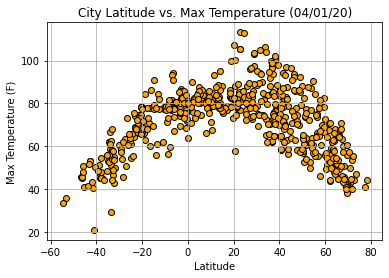

<Figure size 432x288 with 0 Axes>

In [162]:

#Creating plot
plt.scatter(clean_city_df["Latitude"], clean_city_df["Max Temp"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature (04/01/20)")
plt.show()
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

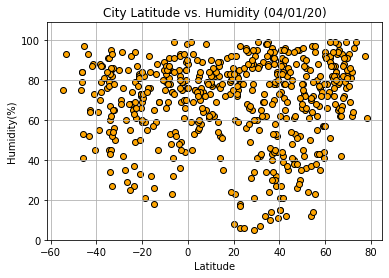

In [137]:
plt.scatter(clean_city_df["Latitude"], clean_city_df["Humidity"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.ylim(0, clean_city_df["Humidity"].max()+10)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity (04/01/20)")
plt.show()
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

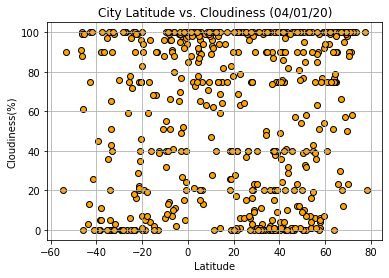

In [138]:
plt.scatter(clean_city_df["Latitude"],clean_city_df["Cloudiness"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness (04/01/20)")
plt.show()
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

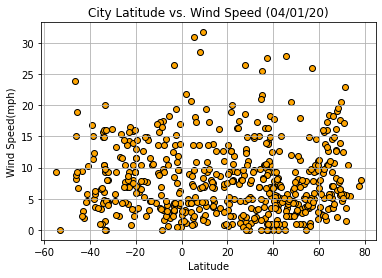

In [139]:
plt.scatter(clean_city_df["Latitude"], clean_city_df["Wind Speed"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed (04/01/20)")
plt.show()
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [140]:
N_Hemisphere = clean_city_df.loc[clean_city_df["Latitude"] >= 0]
S_Hemisphere = clean_city_df.loc[clean_city_df["Latitude"] < 0]

In [141]:
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.64


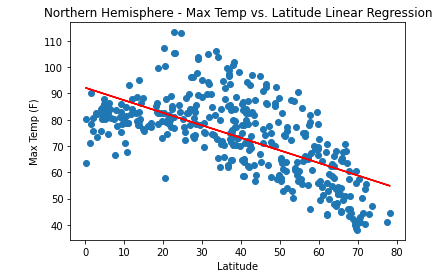

In [161]:
equation = linear_regression(N_Hemisphere["Latitude"], N_Hemisphere["Max Temp"])

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

annotate(equation, -20, 30)

plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")



The r-value is: 0.46937863826630627


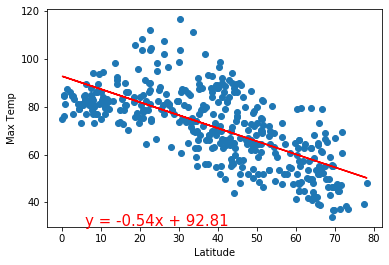

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


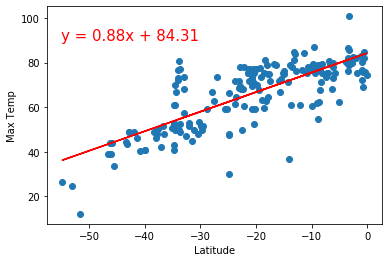

The r-squared is : 0.84


Text(0, 0.5, 'Max Temp (F)')

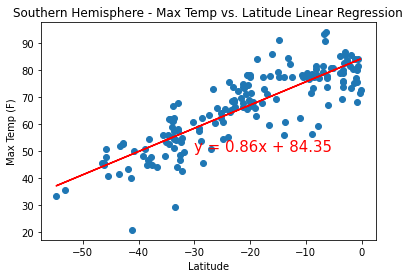

In [146]:
equation = linear_regression(S_Hemisphere["Latitude"],S_Hemisphere["Max Temp"])

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

annotate(equation, -20, 30)

plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


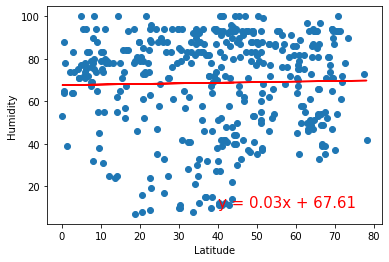

The r-squared is : 0.05


Text(0, 0.5, 'Humidity (%)')

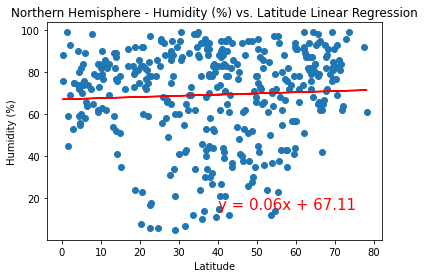

In [148]:
equation = linear_regression(N_Hemisphere["Latitude"], N_Hemisphere["Humidity"])

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

annotate(equation, 20, 30)

plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


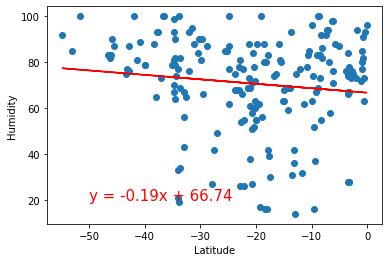

The r-squared is : 0.02


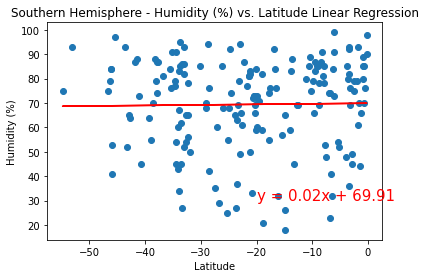

In [160]:
equation = linear_regression(S_Hemisphere["Latitude"], S_Hemisphere["Humidity"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

annotate(equation, -20, 30)

plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


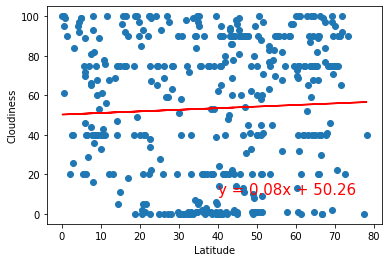

The r-squared is : 0.03


Text(0, 0.5, 'Cloudiness')

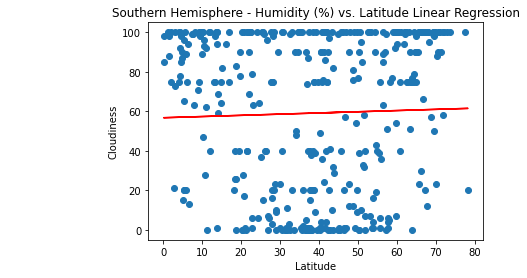

In [151]:
equation = linear_regression(N_Hemisphere["Latitude"], N_Hemisphere["Cloudiness"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

annotate(equation, -20, 30)

plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


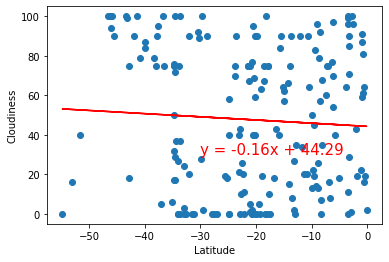

The r-squared is : 0.19


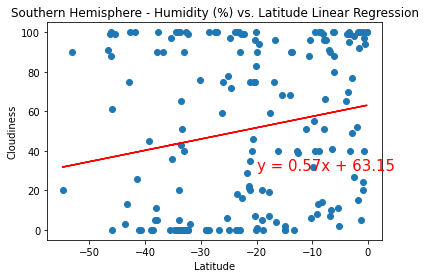

In [163]:
equation = linear_regression(S_Hemisphere["Latitude"], S_Hemisphere["Cloudiness"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

annotate(equation, -20, 30)

plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


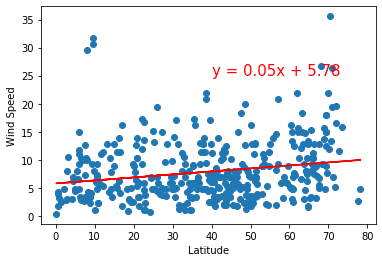

The r-squared is : 0.01


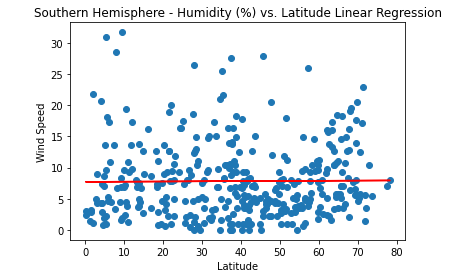

In [164]:
equation = linear_regression(N_Hemisphere["Latitude"], N_Hemisphere["Wind Speed"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

annotate(equation, -20, 30)

plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


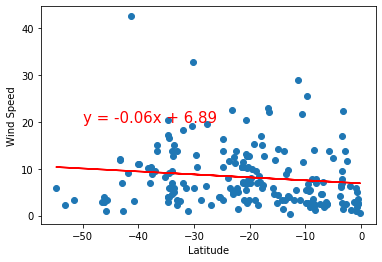

In [ ]:
equation = linear_regression(S_Hemisphere["Latitude"], S_Hemisphere["Wind Speed"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

annotate(equation, -20, 30)

plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")